- 사전준비
  - train.csv, test.csv 다운로드 후 구글드라이브 data에 위치

In [32]:
# /content/drive/MyDrive/2. 데이터분석/data/train.csv

import numpy as np
import pandas as pd
import os

# 데이터 경로
path = '/content/drive/MyDrive/2. 데이터분석/data'

# os.path.join() : 운영체계에 상관없이 경로법을 고려하여 최정 경로를 완성
train = pd.read_csv(os.path.join(path, 'train.csv'))
test = pd.read_csv(os.path.join(path, 'test.csv'))

train.shape, test.shape

((300000, 25), (200000, 24))

# 설명분석

- 사전 정보
  - 컬럼 종류
    - bin_0 ~ 4
    - nom_0 ~ 9
    - ord_0 ~ 5
    - day
    - month
    - target

In [33]:
train.head(2)

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0


In [34]:
# 결측검사
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      300000 non-null  int64 
 1   bin_0   300000 non-null  int64 
 2   bin_1   300000 non-null  int64 
 3   bin_2   300000 non-null  int64 
 4   bin_3   300000 non-null  object
 5   bin_4   300000 non-null  object
 6   nom_0   300000 non-null  object
 7   nom_1   300000 non-null  object
 8   nom_2   300000 non-null  object
 9   nom_3   300000 non-null  object
 10  nom_4   300000 non-null  object
 11  nom_5   300000 non-null  object
 12  nom_6   300000 non-null  object
 13  nom_7   300000 non-null  object
 14  nom_8   300000 non-null  object
 15  nom_9   300000 non-null  object
 16  ord_0   300000 non-null  int64 
 17  ord_1   300000 non-null  object
 18  ord_2   300000 non-null  object
 19  ord_3   300000 non-null  object
 20  ord_4   300000 non-null  object
 21  ord_5   300000 non-null  object
 

- 피처(특성, 컬럼) 요약표(df 구성)
  ```
    - 인덱스 : 컬럼명 (id, target 제외)
    - 컬럼   : 타입, 결측치 수, 고유값 수, 샘플값 1개, 데이터 유형('이진형', '순서형', '명목형', '연속형', '이산형')

    이렇게 표현되도록 feature_summary 변수를 구성하시오
  ```

In [35]:
# 데이터 프레임의 모든 컬럼의 타입 구한것
train.dtypes # Series

,0
id,int64
bin_0,int64
bin_1,int64
bin_2,int64
bin_3,object
bin_4,object
nom_0,object
nom_1,object
nom_2,object
nom_3,object


In [36]:
# 실습
def summary_feature(df):
  # DataFrame 생성 + 타입 컬럼 한개 추가
  summary_df = pd.DataFrame(train.dtypes, columns=['타입'])
  # 결측치의 수 -> df가 완성이 되어 있음 -> 파생변수 생성
  summary_df['결측치 수'] = df.isna().sum()
  # 고유값의 수
  summary_df['고유값 수'] = df.nunique()
  # 샘플값 -> 첫번째 데이터 활용
  summary_df['샘플값'] = df.loc[0, :]
  # 데이터 유형
  # '이진형', '순서형', '명목형', '연속형', '이산형'
  data_style_nm = '데이터유형'
  summary_df[data_style_nm] = None # 값이 없다
  # 데이터 유형 분류
  # 데이터가 변경되면 다른 유형으로 조건식 부여 -> 통상적 적용
  # 고유값 계산 -> 판단 -> 2개 : 바이너리, 소수개 : 명목|순서|이산 가능
  # 문자열 -> 명목형|순서형, 수치 -> 이산형
  # 고유값 개수 -> 타입이 float, 개수도 많다면 => 연속형 간주 검토필요
  for col in df.columns:
    # print(col)
    if 'bin' in col:
      summary_df.loc[col, data_style_nm] = '이진형'
    elif 'nom' in col:
      summary_df.loc[col, data_style_nm] = '명목형'
    elif 'ord' in col:
      summary_df.loc[col, data_style_nm] = '순서형'
    elif 'day' in col or 'month' in col:
      summary_df.loc[col, data_style_nm] = '시간형'
    # day컬럼, month 컬럼 채우기 = '시간형'


  return summary_df

feature_summary = summary_feature(train)
# 연속형 마지막에 처리 id, target 제거
feature_summary.drop(['id', 'target'], inplace=True)
feature_summary

,타입,결측치 수,고유값 수,샘플값,데이터유형
bin_0,int64,0,2,0,이진형
bin_1,int64,0,2,0,이진형
bin_2,int64,0,2,0,이진형
bin_3,object,0,2,T,이진형
bin_4,object,0,2,Y,이진형
nom_0,object,0,3,Green,명목형
nom_1,object,0,6,Triangle,명목형
nom_2,object,0,6,Snake,명목형
nom_3,object,0,6,Finland,명목형
nom_4,object,0,4,Bassoon,명목형


In [37]:
# 샘플값 1개
# train.loc[0, :]
train.sample(1).T

,85454
id,85454
bin_0,0
bin_1,0
bin_2,0
bin_3,F
bin_4,Y
nom_0,Blue
nom_1,Square
nom_2,Snake
nom_3,China


In [38]:
# 각 컬럼별 고유값의 개수 확인
train.nunique()

,0
id,300000
bin_0,2
bin_1,2
bin_2,2
bin_3,2
bin_4,2
nom_0,3
nom_1,6
nom_2,6
nom_3,6


In [39]:
# 결측치의 총합 - 컬럼별로 구성
train.isna().sum()

,0
id,0
bin_0,0
bin_1,0
bin_2,0
bin_3,0
bin_4,0
nom_0,0
nom_1,0
nom_2,0
nom_3,0


# EDA - 상관관계 분석

  - 상관계수를 히트맵 표현

In [40]:
# 데이터 로드
path = '/content/drive/MyDrive/2. 데이터분석/data/Q3'

# os.path.join() : 운영체계에 상관없이 경로법을 고려하여 최정 경로를 완성
train = pd.read_csv(os.path.join(path, 'train.csv'))
test = pd.read_csv(os.path.join(path, 'test.csv'))

train.shape, test.shape

((10886, 12), (6493, 9))

- 사전 데이터 설명
```
  - 공공 자전거 수요 예측 데이터
  - 특정 기간동안 대여했던 기록 데이터
    - 날씨, 날짜, 등등  정보
    - 눈/비 -> 잘 안옴
    - 출/퇴근 -> 많이 사용
  - datetime : 년월일 시분초 -> 시간
  - season : 봄, 여름, 가을, 겨울(1, 2, 3, 4) -> 범주형/이산형
  - holiday : 휴일 여부 -> 이진형 예상
  - workingday : 일하는날 여부 -> 이진형 예상
  - weather	temp	atemp	humidity	windspeed : 날씨(맑음, 약간흐림, 약간 눈과 비, 폭풍/천둥/번개) -> 범주형
                                                      : 온도, 체감온도, 상대습도, 풍속 -> 연속형 -> 상관관계 분석
  - casual : 제외
  - registered : 제외
  - count : 수요량
```

In [41]:
train.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16


In [42]:
# 오후 학습 정리시 피처 요약표 구성

<Axes: xlabel='windspeed', ylabel='count'>

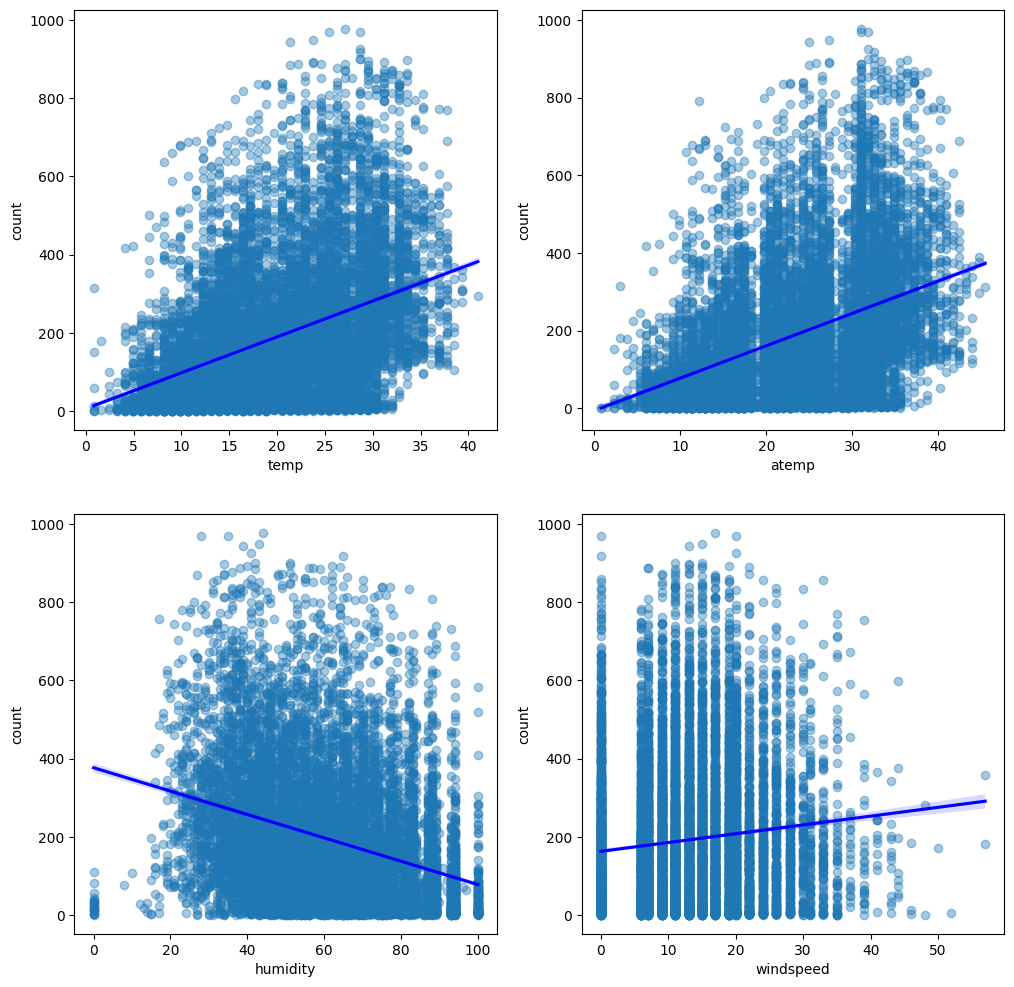

In [43]:
# 연속형 변수에 대해 상관관계 체크
# 온도:수요량, 체감온도:수요량, 풍속:수요량, 습도:수요량
# 차트 1개 자리를 4등분해서 표현
import matplotlib.pyplot as plt
import seaborn as sns

# 반환값 : 차트모양, 축정보
fig, axes = plt.subplots(nrows=2, ncols=2) # 2x2 지정
# 크기 설정
fig.set_size_inches(2*6, 2*6) # 6은 가정(설정)한 기준 단위

# 두 변수(독립변수, 종속변수)간의 회귀선 시각화

sns.regplot(x='temp', y='count', data=train, ax=axes[0, 0], line_kws={'color':'blue'}, scatter_kws={'alpha':0.4})
sns.regplot(x='atemp', y='count', data=train, ax=axes[0, 1], line_kws={'color':'blue'}, scatter_kws={'alpha':0.4})
sns.regplot(x='humidity', y='count', data=train, ax=axes[1, 0], line_kws={'color':'blue'}, scatter_kws={'alpha':0.4})
sns.regplot(x='windspeed', y='count', data=train, ax=axes[1, 1], line_kws={'color':'blue'}, scatter_kws={'alpha':0.4})

- 온도/체감온도가 상승하면(여름으로 갈수록) 수요량 증가
  - 겨울은 추워서 잘이용 안함, 온도가 올라갈 수록 활동지수등 상승해서 외부 활동을 많이 하는듯 하다(근거가 붙어야 하지만 가능한 표현)

- 습도가 높으면 수요량 하락
  - 습도가 높으면, 불쾌지수 상승, 활동 제한적...

- 풍속이 강해질수록 아주 약하게 수요량 증가

- 상관관계 분석
  - 연속형 데이터간 상관계수 분석

In [44]:
# 데이터 추출
df_corr = train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()
df_corr

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


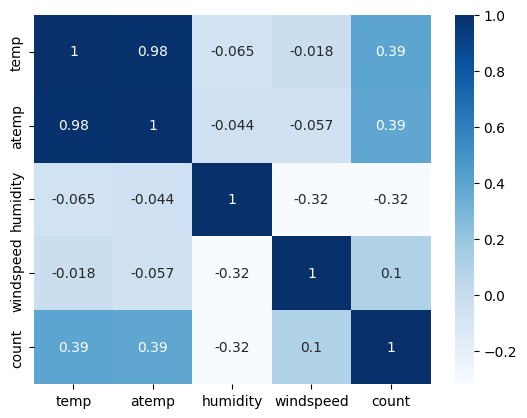

In [45]:
# 히트맵을 통해 상관계수 표현 -> 해석
sns.heatmap(df_corr, annot=True, cmap='Blues')
plt.show()
# 상관계수가 양의 방향으로 높을수록 진한 블루색상
# 해석
# temp, atemp 비교 x, 당연히 강한 양의 상관관계임
# temp(온도), count(수요량) : 0.39 양의 상관관계가 있다
# 습도와 수요량은 -0.32, 음의 상관관계가 있다
# 풍속과 수요량은 0.1 : 거의 상관관계가 없다, 아주 약하게 존재한다

# CRM(이커머스) 시반 코호트 분석

- 데이터 애널리스트가 마케팅 계획 수립시 항목중에 하나임
  - 비즈니스 인사이트 획득
    - 마케팅 관점에 고객 특성 파악
    - 고객이 어떤 행동을 한 이후 다시 행동할때까지 특성 파악/패턴 파악
    - LTV, PMF, AARRR등 여러 분석을 추가적 진행
    - 데이터 드리븐 영역 확인
      - 전문 용어를 백그라운드

- 데이터
  - retail 데이터
  - https://github.com/springcoil/marsmodelling
  - 고객 정의 -> 고객 유지율(Retention)을 계산
  

- 데이터 (차후 학습정리, 프로젝트로 진행해도됨)
  - OTT 데이터 (넷플릭스)
  - https://www.kaggle.com/datasets/vodclickstream/netflix-audience-behaviour-uk-movies (캐글)

- 개요
  - 정액제 기반 콘텐츠를 소비하는 서비스
    - 최초 소비 시간
    - 소비를 한 기간(50분 시청, 10분 시청)
    - 인터벌 중요(시청한 인터벌 기준)

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

- 데이터 로드

In [86]:
# 데이터 : /content/drive/MyDrive/2. 데이터분석/data/relay-foods.xlsx
# 시트  : Purchase Data - Full Study

# 구매 데이터
df = pd.read_excel('/content/drive/MyDrive/2. 데이터분석/data/relay-foods.xlsx', sheet_name='Purchase Data - Full Study')

df.head(3)

/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,OrderId,OrderDate,UserId,TotalCharges,CommonId,PupId,PickupDate
0,262,2009-01-11,47,50.67,TRQKD,2,2009-01-12
1,278,2009-01-20,47,26.60,4HH2S,3,2009-01-20
2,294,2009-02-03,47,38.71,3TRDC,2,2009-02-04


In [87]:
'''
'OrderId' : 주문번호(주문관리번호)
'OrderDate', : 주문일자 -> 특정 고객이 최초 주문한 날짜, 이후 주문한 날짜 확인
'UserId', : 고객 번호
'TotalCharges', : 결제 비용
'CommonId',  : ?
'PupId', : ?
'PickupDate' : 배송/물건을 수령한 날짜 (통상 주문일, 주문일+1 픽업)
'''
# 컬럼 정보
df.columns

Index(['OrderId', 'OrderDate', 'UserId', 'TotalCharges', 'CommonId', 'PupId',
       'PickupDate'],
      dtype='object')

In [88]:
# 데이터 2891개, 컬럼 7
df.shape

(2891, 7)

In [89]:
# 실습 : 파생변수 OrderPeroid 생성, OrderDate로부터 추출 데이터 구성
# OrderDate 타입 확인(datetime64[ns]) => 전략수립 strftime() => 작성
df.dtypes

,0
OrderId,int64
OrderDate,datetime64[ns]
UserId,int64
TotalCharges,float64
CommonId,object
PupId,int64
PickupDate,datetime64[ns]


In [90]:
# OrderDate 컬럼의 데이터를 하나씩 꺼내서(apply() o, str x) -> strfime() -> 2009-01
df['OrderPeroid'] = df.OrderDate.apply(lambda x: x.strftime('%Y-%m'))
df.head(2)

,OrderId,OrderDate,UserId,TotalCharges,CommonId,PupId,PickupDate,OrderPeroid
0,262,2009-01-11,47,50.67,TRQKD,2,2009-01-12,2009-01
1,278,2009-01-20,47,26.60,4HH2S,3,2009-01-20,2009-01


In [91]:
# 코호트 집단에 대한 잡계 단위 고유값 확인
df['OrderPeroid'].nunique()

15

In [92]:
# 고객별 최초 구매일 찾아서 파생변수 생성
# 1. UserId(고객을 구분하는 아이디)를 인덱스로 조정(set_index, reset_index), 원본 수정
# 실습
df.set_index('UserId', inplace=True) # 고객별로 인덱스로 모였음(오름차순 정렬, 맨앞 값이 최초 구매일이 됨)

df.head(3)

,OrderId,OrderDate,TotalCharges,CommonId,PupId,PickupDate,OrderPeroid
UserId,,,,,,,
47,262,2009-01-11,50.67,TRQKD,2,2009-01-12,2009-01
47,278,2009-01-20,26.60,4HH2S,3,2009-01-20,2009-01
47,294,2009-02-03,38.71,3TRDC,2,2009-02-04,2009-02


In [93]:
df.shape

(2891, 7)

In [94]:
# 실습 : UserId별 첫 구매일 정보 추출
# 첫구매일은 유저별 가장 맨앞에 있는 첫번째 데이터임(동일)
df.groupby('UserId')['OrderDate'].min()

,OrderDate
UserId,
47,2009-01-11
95,2009-03-10
98,2009-01-29
112,2009-01-19
141,2009-11-13
...,...
393616,2010-03-08
394290,2010-03-07
394346,2010-03-07


In [95]:
# 실습 : UserId별 첫 구매일 정보 추출 -> 년-월 형식(코호트 집단 형식)으로 표현
df.groupby('UserId')['OrderDate'].min().apply(lambda x: x.strftime('%Y-%m'))

# 개인별 최초 구매일을 코호트 집단 구분값 형식으로 표현

,OrderDate
UserId,
47,2009-01
95,2009-03
98,2009-01
112,2009-01
141,2009-11
...,...
393616,2010-03
394290,2010-03
394346,2010-03


In [96]:
# 현재 df는 인덱스가 1개 레벨로 구성되어 있음 = level 0
# level 0을 활용하여 집계시 표현할 수 있음

# 고객별 최초 구매일을 코호트 그룹값 적용
df['CohortGroup'] = df.groupby(level=0)['OrderDate'].min().apply(lambda x: x.strftime('%Y-%m'))
# 여기서 level=0 == 'UserId'와 동일한 표현

df.head(5)

,OrderId,OrderDate,TotalCharges,CommonId,PupId,PickupDate,OrderPeroid,CohortGroup
UserId,,,,,,,,
47,262,2009-01-11,50.67,TRQKD,2,2009-01-12,2009-01,2009-01
47,278,2009-01-20,26.60,4HH2S,3,2009-01-20,2009-01,2009-01
47,294,2009-02-03,38.71,3TRDC,2,2009-02-04,2009-02,2009-01
47,301,2009-02-06,53.38,NGAZJ,2,2009-02-09,2009-02,2009-01
47,302,2009-02-06,14.28,FFYHD,2,2009-02-09,2009-02,2009-01


In [97]:
# UserId를 원복 -> 컬럼으로 복구
# 실습
# 인덱스 초기화, 원래 있던 인덱스 값은 삭제 x => 컬럼으로 돌아간다
df.reset_index(inplace=True)

df.head(3)

,UserId,OrderId,OrderDate,TotalCharges,CommonId,PupId,PickupDate,OrderPeroid,CohortGroup
0,47,262,2009-01-11,50.67,TRQKD,2,2009-01-12,2009-01,2009-01
1,47,278,2009-01-20,26.60,4HH2S,3,2009-01-20,2009-01,2009-01
2,47,294,2009-02-03,38.71,3TRDC,2,2009-02-04,2009-02,2009-01


In [102]:
# 데이터 확인
# 개인별 코호트 그룹값과 OrderPeroid값이 상이한 데이터를 모두 추출하시오

# 쿼리 함수(블리언 인덱싱과 동일한 결과를 제공, 표현이 자유로움)
df.query('CohortGroup != OrderPeroid')

,UserId,OrderId,OrderDate,TotalCharges,CommonId,PupId,PickupDate,OrderPeroid,CohortGroup
2,47,294,2009-02-03,38.7100,3TRDC,2,2009-02-04,2009-02,2009-01
3,47,301,2009-02-06,53.3800,NGAZJ,2,2009-02-09,2009-02,2009-01
4,47,302,2009-02-06,14.2800,FFYHD,2,2009-02-09,2009-02,2009-01
5,47,321,2009-02-17,29.5000,HA5R3,3,2009-02-17,2009-02,2009-01
6,47,333,2009-02-23,18.9100,RSXQG,2,2009-02-23,2009-02,2009-01
...,...,...,...,...,...,...,...,...,...
2847,369133,3094,2010-03-01,17.7900,SAPNJ,7,2010-03-04,2010-03,2010-02
2849,370402,3119,2010-03-02,37.3552,ZLBJ5,9,2010-03-03,2010-03,2010-02
2862,376775,3227,2010-03-08,43.7000,Q53K9,9,2010-03-10,2010-03,2010-02
2868,380119,3224,2010-03-08,56.7115,ZRWZB,15,2010-03-08,2010-03,2010-02


In [104]:
'''
  인덱스 -> 집계 기준이 2개 -> 레벨이 2개 발생
    - lever 0 : CohortGroup
    - lever 1 : OrderPeroid
  컬럼
    - UserId : 고유한값만 모아서 카운트
    - OrderId : 고유한값만 모아서 카운트
    - TotalCharges : 총합(월별 총주문액)

  이렇게 구성되는 cohort_df를 구성하시오 실습.
'''
groupby = df.groupby(['CohortGroup', 'OrderPeroid'])

groupby.agg({
    'UserId': pd.Series.nunique,
    'OrderId': pd.Series.nunique,
    'TotalCharges': 'sum'
})
cohort_df

TotalUsers  TotalOrders  TotalCharges
CohortGroup OrderPeroid                                       
2009-01     2009-01              22           30     1850.2550
            2009-02               8           25     1351.0650
            2009-03              10           26     1357.3600
            2009-04               9           28     1604.5000
            2009-05              10           26     1575.6250
...                             ...          ...           ...
2010-01     2010-02              50          101     8453.1039
            2010-03              26           31     2238.6461
2010-02     2010-02             100          139     7374.7108
            2010-03              19           19      945.9633
2010-03     2010-03              24           26     1099.5471

[119 rows x 3 columns]

In [107]:
'''
  - 해석
    - 2009-02 그룹은 15명이 최대인원
      - 2009-05월까지 계속해서 고객유지율 감소(하방추세) 15-> 3->5->1
      - 주문수(OrderId)가 이용고객수(UserId)보다 많았음 -> 특정 고객이 여러번 주문했다
      - 2009-04월에 최대 구매(968.7800$)발생
    - 세부 정보가 없어서 분석의 한계는 있지만, 1/3 정도 고객은 지속적 방문(재방문) 구매 진행된것으로 예상
'''
# 코호트 그룹 2009-02에 대한 데이터 추출, 분석
cohort_df.query('CohortGroup == "2009-02"')

TotalUsers  TotalOrders  TotalCharges
CohortGroup OrderPeroid                                       
2009-02     2009-02              15           15      666.3100
            2009-03               3            8      501.6100
            2009-04               5           10      968.7800
            2009-05               1            2       53.3600
            2009-06               4            9      758.5200
            2009-07               4           11      667.1000
            2009-08               4            6      314.1752
            2009-09               5           12      567.5057
            2009-10               5            7      328.2800
            2009-11               4            6      738.9359
            2009-12               3            5      263.1971
            2010-01               3            5      550.0098
            2010-02               5            9      734.7613

In [109]:
# cohort_df의 컬럼명 변경, 의도에 맞게 재구성
cohort_df.rename(columns={
    'UserId' : 'TotalUsers',
    'OrderId': 'TotalOrders'
}, inplace=True)

cohort_df.head(2)

TotalUsers  TotalOrders  TotalCharges
CohortGroup OrderPeroid                                       
2009-01     2009-01              22           30      1850.255
            2009-02               8           25      1351.065

In [110]:
# 코호트 그룹, M, M+1, M+2, M+3, .. 표기 가능
cohort_df.head(20)

TotalUsers  TotalOrders  TotalCharges
CohortGroup OrderPeroid                                       
2009-01     2009-01              22           30     1850.2550
            2009-02               8           25     1351.0650
            2009-03              10           26     1357.3600
            2009-04               9           28     1604.5000
            2009-05              10           26     1575.6250
            2009-06               8           26     1384.8400
            2009-07               8           24     1750.8400
            2009-08               7           21     1426.5714
            2009-09               7           24     1964.2755
            2009-10               7           13      860.3292
            2009-11               7           21     1821.8153
            2009-12               8           22     2152.1165
            2010-01              11           25     2084.2236
            2010-02               7           19     2068.7771
            2010-03               6           12     1504.3325
2009-02     2009-02              15           15      666.3100
            2009-03               3            8      501.6100
            2009-04               5           10      968.7800
            2009-05               1            2       53.3600
            2009-06               4            9      758.5200

In [111]:
# level 1의 표현을 1, 2, 3, 4, 5 ... 12
group = cohort_df.groupby(level=0)
group.groups
# '2009-01' 그룹에 대한 level= 1의 총 구성원수 표현
# '2009-02' 그룹에 대한 level= 1의 총 구성원수 표현
# '2009-03' 그룹에 대한 level= 1의 총 구성원수 표현
# ...

{'2009-01': [('2009-01', '2009-01'), ('2009-01', '2009-02'), ('2009-01', '2009-03'), ('2009-01', '2009-04'), ('2009-01', '2009-05'), ('2009-01', '2009-06'), ('2009-01', '2009-07'), ('2009-01', '2009-08'), ('2009-01', '2009-09'), ('2009-01', '2009-10'), ('2009-01', '2009-11'), ('2009-01', '2009-12'), ('2009-01', '2010-01'), ('2009-01', '2010-02'), ('2009-01', '2010-03')], '2009-02': [('2009-02', '2009-02'), ('2009-02', '2009-03'), ('2009-02', '2009-04'), ('2009-02', '2009-05'), ('2009-02', '2009-06'), ('2009-02', '2009-07'), ('2009-02', '2009-08'), ('2009-02', '2009-09'), ('2009-02', '2009-10'), ('2009-02', '2009-11'), ('2009-02', '2009-12'), ('2009-02', '2010-01'), ('2009-02', '2010-02')], '2009-03': [('2009-03', '2009-03'), ('2009-03', '2009-04'), ('2009-03', '2009-05'), ('2009-03', '2009-06'), ('2009-03', '2009-07'), ('2009-03', '2009-08'), ('2009-03', '2009-09'), ('2009-03', '2009-10'), ('2009-03', '2009-11'), ('2009-03', '2009-12'), ('2009-03', '2010-01'), ('2009-03', '2010-02'), (

In [113]:
# 코호트 그룹별로 집계 -> 하위 인덱스의 수는 각각 상이하다
# 코호트 그룹내에 M, M+1, M+2, ...
#                 1, 2, 3, ...
def make_period(df):
  # print(df.shape)
  # 기간표기
  # 기존 CohortPeroid : 2009-02 => 아래 코드 작동 => 코호트 그룹내 순번(n개월차로 표기) 2 or 3...
  df['CohortPeroid'] = np.arange(df.shape[0]) + 1 # 0+1 <= x < df.shape[0]+1
  return df

# df.apply(), 이전까지 사용한 apply()는 Series.apply()
tmp = cohort_df.groupby(level = 0).apply(make_period)
tmp

TotalUsers  TotalOrders  TotalCharges  \
CohortGroup CohortGroup OrderPeroid                                          
2009-01     2009-01     2009-01              22           30     1850.2550   
                        2009-02               8           25     1351.0650   
                        2009-03              10           26     1357.3600   
                        2009-04               9           28     1604.5000   
                        2009-05              10           26     1575.6250   
...                                         ...          ...           ...   
2010-01     2010-01     2010-02              50          101     8453.1039   
                        2010-03              26           31     2238.6461   
2010-02     2010-02     2010-02             100          139     7374.7108   
                        2010-03              19           19      945.9633   
2010-03     2010-03     2010-03              24           26     1099.5471   

                                     CohortPeroid  
CohortGroup CohortGroup OrderPeroid                
2009-01     2009-01     2009-01                 1  
                        2009-02                 2  
                        2009-03                 3  
                        2009-04                 4  
                        2009-05                 5  
...                                           ...  
2010-01     2010-01     2010-02                 2  
                        2010-03                 3  
2010-02     2010-02     2010-02                 1  
                        2010-03                 2  
2010-03     2010-03     2010-03                 1  

[119 rows x 4 columns]

In [114]:
# 원본 데이터에 반영
cohort_df['CohortPeroid'] = tmp['CohortPeroid'].values

cohort_df.head(2)

TotalUsers  TotalOrders  TotalCharges  CohortPeroid
CohortGroup OrderPeroid                                                     
2009-01     2009-01              22           30      1850.255             1
            2009-02               8           25      1351.065             2

In [116]:
cohorts = cohort_df.copy(deep=True)
cohorts.head(3)

TotalUsers  TotalOrders  TotalCharges  CohortPeroid
CohortGroup OrderPeroid                                                     
2009-01     2009-01              22           30      1850.255             1
            2009-02               8           25      1351.065             2
            2009-03              10           26      1357.360             3

In [117]:
cohorts.reset_index(inplace=True) # 인덱스 => 컬럼으로 복귀(혹은 추가됨)
cohorts.head(3)

,CohortGroup,OrderPeroid,TotalUsers,TotalOrders,TotalCharges,CohortPeroid
0,2009-01,2009-01,22,30,1850.255,1
1,2009-01,2009-02,8,25,1351.065,2
2,2009-01,2009-03,10,26,1357.360,3


In [118]:
# 인덱스 지정
cohorts.set_index(['CohortGroup','CohortPeroid'], inplace=True)
cohorts.head(3)

# 이용 기간에 대한 표현 직접적 할 수 있음
# 해당 코호트 그룹의 1개월차, 2개월차, ...

OrderPeroid  TotalUsers  TotalOrders  TotalCharges
CohortGroup CohortPeroid                                                   
2009-01     1                2009-01          22           30      1850.255
            2                2009-02           8           25      1351.065
            3                2009-03          10           26      1357.360

- Retention(고객 유지율 %)
  - 코호트 그룹별, 기간별 인원수/코호트 그룹별 최초(첫구매일 기준) 인원수*100

In [127]:
# 코호트 그룹별 첫 구매월 총 인원 수
# 코호트 그룹별 데이터의 첫번째 데이터에 존재하는 TotalUsers 값
cohort_group_first_user = cohorts['TotalUsers'].groupby(level=0).first() # 집계 데이터들 중 첫번째 데이터를 추출
cohort_group_first_user

,TotalUsers
CohortGroup,
2009-01,22
2009-02,15
2009-03,13
2009-04,39
2009-05,50
2009-06,32
2009-07,50
2009-08,31
2009-09,37


- 코호트 차트 구성을 위한 df 조작
  - 컬럼 -> 인덱스(특정 레벨로)이동 : stack()
  - 인덱스(특정레벨) -> 컬럼이동: unstack()
  - <img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*DYDOif_qBEgtWfFKUDSf0Q.png">

In [122]:
cohorts.head()

OrderPeroid  TotalUsers  TotalOrders  TotalCharges
CohortGroup CohortPeroid                                                   
2009-01     1                2009-01          22           30      1850.255
            2                2009-02           8           25      1351.065
            3                2009-03          10           26      1357.360
            4                2009-04           9           28      1604.500
            5                2009-05          10           26      1575.625

In [125]:

# 인덱스 : 코호트 그룹, 컬럼 : 기간, 데이터 : 코호트 그룹별, 기간별 사용자수
cohorts['TotalUsers'].unstack(1)

CohortPeroid,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
CohortGroup,,,,,,,,,,,,,,,
2009-01,22.0,8.0,10.0,9.0,10.0,8.0,8.0,7.0,7.0,7.0,7.0,8.0,11.0,7.0,6.0
2009-02,15.0,3.0,5.0,1.0,4.0,4.0,4.0,5.0,5.0,4.0,3.0,3.0,5.0,NaN,NaN
2009-03,13.0,4.0,5.0,4.0,1.0,2.0,2.0,3.0,2.0,1.0,3.0,2.0,1.0,NaN,NaN
2009-04,39.0,13.0,10.0,13.0,6.0,7.0,4.0,6.0,2.0,4.0,3.0,2.0,NaN,NaN,NaN
2009-05,50.0,13.0,12.0,5.0,4.0,6.0,3.0,5.0,5.0,4.0,3.0,NaN,NaN,NaN,NaN
2009-06,32.0,15.0,9.0,6.0,7.0,5.0,3.0,3.0,10.0,3.0,NaN,NaN,NaN,NaN,NaN
2009-07,50.0,23.0,13.0,10.0,11.0,10.0,11.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
2009-08,31.0,11.0,9.0,7.0,6.0,8.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-09,37.0,15.0,14.0,8.0,13.0,9.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
# 리텐션 획득 -> 차트를 그리기 위해서(EDA) 변경 진행
retention_df = cohorts['TotalUsers'].unstack(0) / cohort_group_first_user
retention_df
# 해석 2009-01 코호트 그룹은 15주차때 15% 고객이 유지되고 있다 (일단 표현)

CohortGroup,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03
CohortPeroid,,,,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.00,1.00000,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.0
2,0.363636,0.200000,0.307692,0.333333,0.26,0.46875,0.46,0.354839,0.405405,0.314815,0.246154,0.261538,0.526316,0.19,NaN
3,0.454545,0.333333,0.384615,0.256410,0.24,0.28125,0.26,0.290323,0.378378,0.222222,0.200000,0.276923,0.273684,NaN,NaN
4,0.409091,0.066667,0.307692,0.333333,0.10,0.18750,0.20,0.225806,0.216216,0.240741,0.223077,0.107692,NaN,NaN,NaN
5,0.454545,0.266667,0.076923,0.153846,0.08,0.21875,0.22,0.193548,0.351351,0.240741,0.100000,NaN,NaN,NaN,NaN
6,0.363636,0.266667,0.153846,0.179487,0.12,0.15625,0.20,0.258065,0.243243,0.129630,NaN,NaN,NaN,NaN,NaN
7,0.363636,0.266667,0.153846,0.102564,0.06,0.09375,0.22,0.129032,0.216216,NaN,NaN,NaN,NaN,NaN,NaN
8,0.318182,0.333333,0.230769,0.153846,0.10,0.09375,0.14,0.129032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.318182,0.333333,0.153846,0.051282,0.10,0.31250,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
retention_df.columns # 코호트 그룹이 컬럼

Index(['2009-01', '2009-02', '2009-03', '2009-04', '2009-05', '2009-06',
       '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12',
       '2010-01', '2010-02', '2010-03'],
      dtype='object', name='CohortGroup')

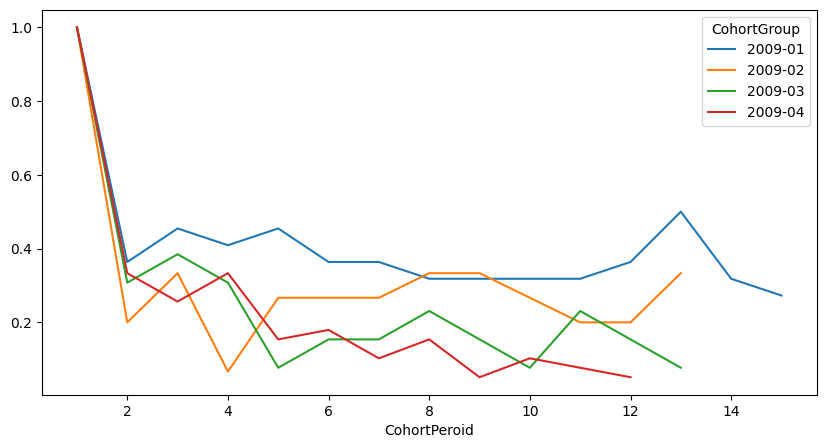

In [132]:
# EDA
# 상위 코호트 그룹 4그룹 추출
retention_df[retention_df.columns[:4]].plot(figsize=(10, 5))
plt.show()
# 모든 그룹은 2개월차에 급격하게 회원이 이탈된다(공통)
# 2009-01 그룹은 그 낙폭이 가장 적다 (40% 수준에서 선방)
# 시간이 흐를수록 회원 이탈의 기울기는 작아지고 있다(서서히 이탈), 2009-01 수준은 27% 수준까지 유지시키고 있음
# 2009-01 그룹 회원들은 어떻게 유입, 어떤 차이가 있고, 등등...
# 회원수가 많다고 매출이 높은 것인가? 분석(별도 분석 필요)
# 이벤트, 시즌(봄, 여름, 가을, 겨울), 온도 등등 정보 추가로 필요 -> 요인 찾아야함

In [133]:
# 가장 일반적인 형태의 코호트 차트
retention_df.T

CohortPeroid,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
CohortGroup,,,,,,,,,,,,,,,
2009-01,1.0,0.363636,0.454545,0.409091,0.454545,0.363636,0.363636,0.318182,0.318182,0.318182,0.318182,0.363636,0.500000,0.318182,0.272727
2009-02,1.0,0.200000,0.333333,0.066667,0.266667,0.266667,0.266667,0.333333,0.333333,0.266667,0.200000,0.200000,0.333333,NaN,NaN
2009-03,1.0,0.307692,0.384615,0.307692,0.076923,0.153846,0.153846,0.230769,0.153846,0.076923,0.230769,0.153846,0.076923,NaN,NaN
2009-04,1.0,0.333333,0.256410,0.333333,0.153846,0.179487,0.102564,0.153846,0.051282,0.102564,0.076923,0.051282,NaN,NaN,NaN
2009-05,1.0,0.260000,0.240000,0.100000,0.080000,0.120000,0.060000,0.100000,0.100000,0.080000,0.060000,NaN,NaN,NaN,NaN
2009-06,1.0,0.468750,0.281250,0.187500,0.218750,0.156250,0.093750,0.093750,0.312500,0.093750,NaN,NaN,NaN,NaN,NaN
2009-07,1.0,0.460000,0.260000,0.200000,0.220000,0.200000,0.220000,0.140000,0.140000,NaN,NaN,NaN,NaN,NaN,NaN
2009-08,1.0,0.354839,0.290323,0.225806,0.193548,0.258065,0.129032,0.129032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-09,1.0,0.405405,0.378378,0.216216,0.351351,0.243243,0.216216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
retention_df.T.isnull() # 결측 부분 확인 가능

CohortPeroid,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
CohortGroup,,,,,,,,,,,,,,,
2009-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2009-02,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
2009-03,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
2009-04,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
2009-05,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
2009-06,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True
2009-07,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
2009-08,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True
2009-09,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True


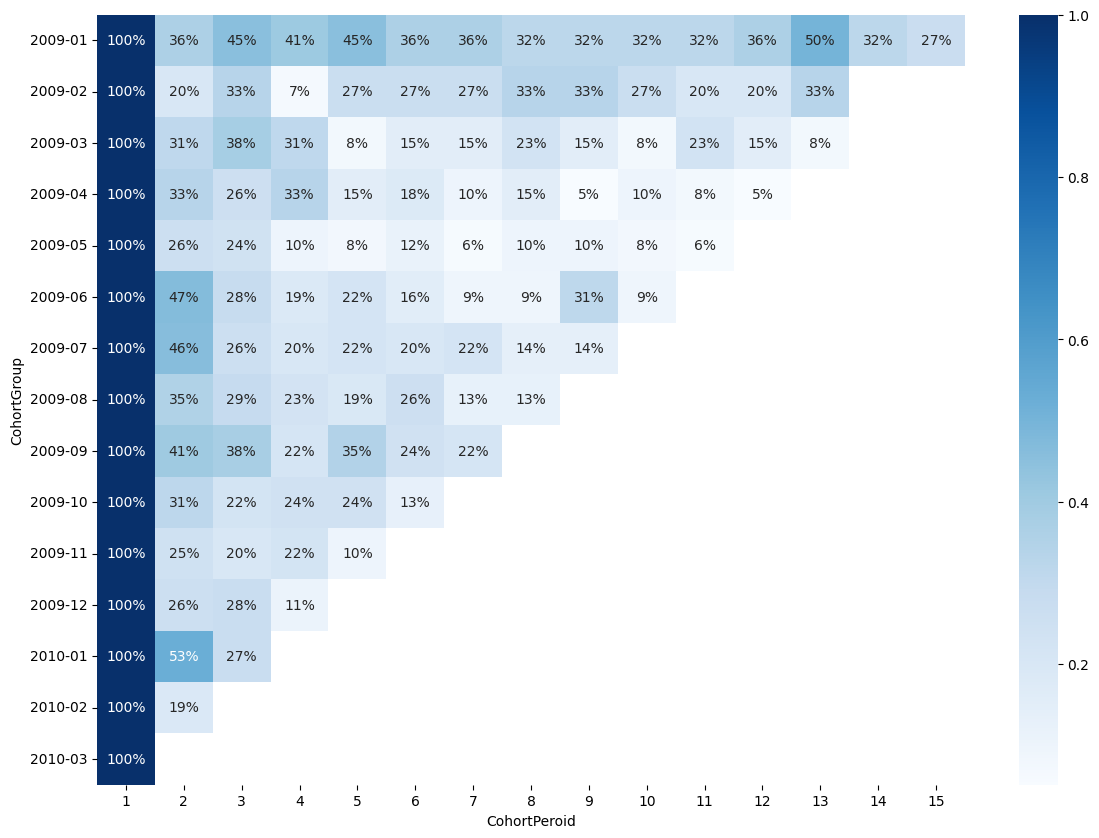

In [136]:
# EDA - 히트맵
import seaborn as sns

plt.figure(figsize=(14, 10)) # 컬러맵 때문에 가로를 길게 처리
sns.heatmap(retention_df.T, annot=True, fmt='.0%', cmap='Blues')
plt.show()

# 2009-02 코호트 그룹 이상징후 발생 14주차에서 고객이탈율이 100% 발생 (체크 필요)
# 수평부분 해석 -> 그룹 해석 -> 인사이트 도출
# 수직부분 해석 -> 기간 해석 -> 인사이트 도출

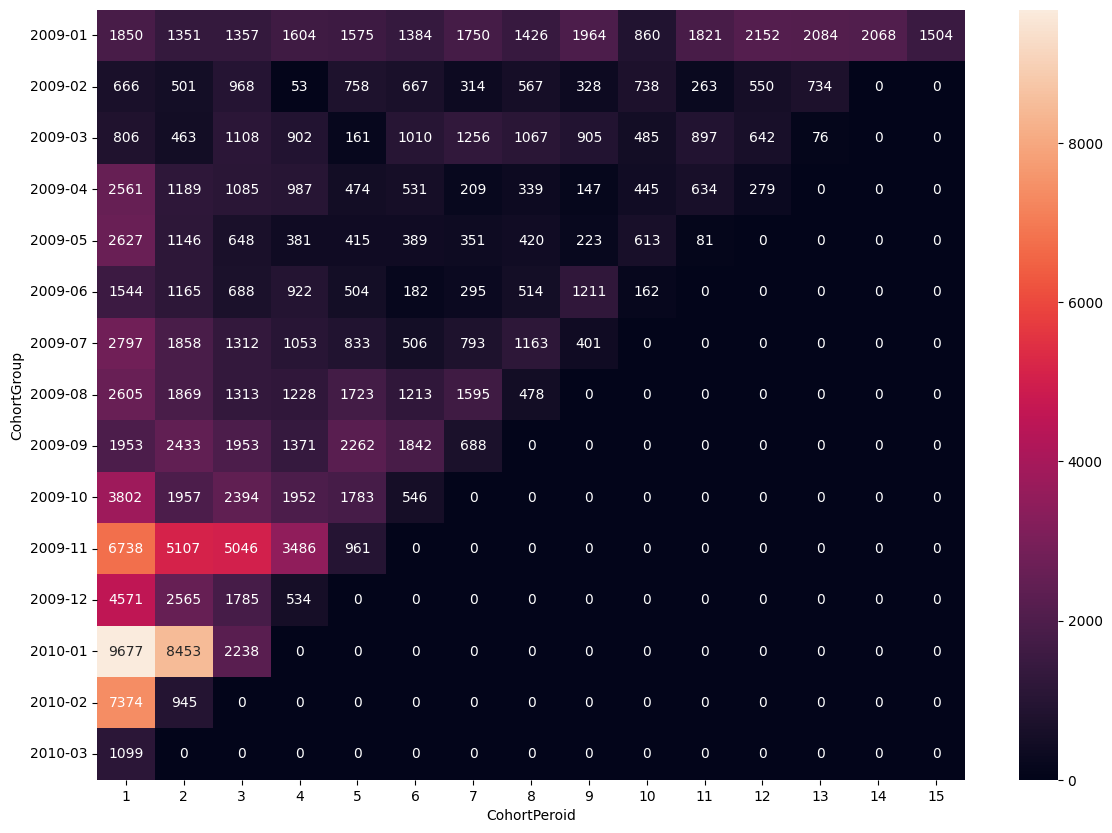

In [137]:
# 매출로 표기
import seaborn as sns

data = cohorts['TotalCharges'].unstack(0).T.fillna(0).astype(int)

plt.figure(figsize=(14, 10)) # 컬러맵 때문에 가로를 길게 처리
sns.heatmap(data, annot=True, fmt='0')
plt.show()

# 매출 추이를 그룹별, 기간별 분석 가능 => 인사이트 도출